In [ ]:
pip install pywaffle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 24.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pywaffle import Waffle
import seaborn as sns
import matplotlib.patches as mpatches  # for the legend

# Outline

*   Load data
*   Basic plot
*   Data scaling
*   Add proportion to the legend
*   Horizontal bar plots
*   Use icons
*   Mutiple bar plots







Load data

In [ ]:
# Load the dataset
df_waffle = pd.read_csv("/content/pop_estimate_processed_2023.csv", sep=",")



Basic plot

In [ ]:
# Filter data for New Zealand total and exclude 'Other' category
df_waffle_nz = df_waffle[
    (df_waffle["Region"] == "Total, New Zealand") & (df_waffle["Generation"] != "Other")
].copy()

# Pivot the DataFrame
df_waffle_nz = df_waffle_nz.pivot_table(
    index="Generation", columns="Region", values="Population", aggfunc="sum"
)

In [ ]:
df_waffle_nz

Region,"Total, New Zealand"
Generation,
Baby Boomer,969010
Gen X,966300
Gen Z,1010650
Millennial,1102490
Silent,206330


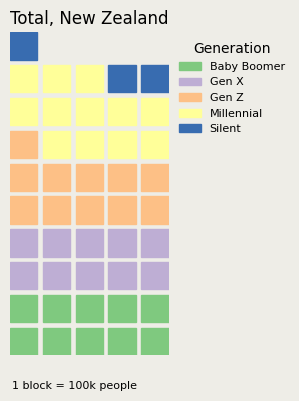

In [ ]:
# Choose data for plotting
df_plot = df_waffle_nz.copy()

# Define constants
col_name = df_plot.columns[0]
scale_factor = 100000 # Each block in the waffle plot will be equal to 100k.

# Pass the axes defined by subplots to Waffle via FigureClass
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        111: {  # This specifies that we are dealing with a single subplot.
            "values": df_plot[col_name] / scale_factor,
            "labels": list(df_plot.index),
            "title": {"label": col_name, "loc": "left", "fontsize": 12},
            "rows": 10,
            "legend": {
                "bbox_to_anchor": (
                    1,
                    1,
                ),  # Sets the coordinates for the legend relative to the axes.
                "fontsize": 8,  # Sets the font size of the text in the legend.
                "title": "Generation",  # Specifies a title for the legend.
                "frameon": False,  # False means no legend border is drawn.
            },
            "rounding_rule": "ceil",  # needed so values less than 100000 will still have at least 1 block
            "vertical": True,
        },
    },
    cmap_name="Accent",  # Color map name
    figsize=(8, 4),  # Overall figure size
)

fig.supxlabel(
    f"1 block = {(scale_factor//1000)}k people",
    fontsize=8,
    x=0.1,  # position at the 14% axis
)
fig.set_facecolor("#EEEDE7")

# Display the chart
plt.show()

Legend

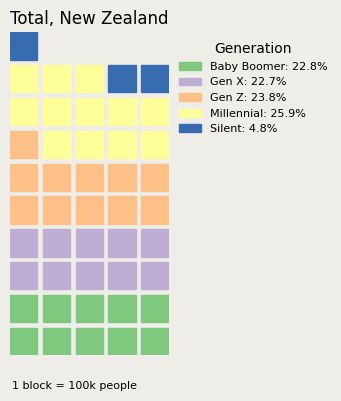

In [ ]:
# Choose data for plotting
df_plot = df_waffle_nz.copy()

# Define constants
col_name = df_plot.columns[0]
scale_factor = 100000

total_population = df_plot[col_name].sum()

# Pass the axes defined by subplots to Waffle via FigureClass
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        111: {  # This specifies that we are dealing with a single subplot
            "values": df_plot[col_name] / scale_factor,
            "labels": [
                f"{index}: {value/total_population:.1%}"
                for index, value in zip(df_plot.index, df_plot[col_name])
            ],
            "title": {"label": col_name, "loc": "left", "fontsize": 12},
            "rows": 10,
            "legend": {
                "bbox_to_anchor": (1, 1),
                "fontsize": 8,
                "title": "Generation",
                "frameon": False,  # Set frameon to False to remove the border
            },
            "rounding_rule": "ceil",  # needed so values less than 100000 will still have at least 1 block
            "vertical": True,
        },
    },
    cmap_name="Accent",  # Color map name
    figsize=(8, 4),  # Overall figure size
)

fig.supxlabel(
    f"1 block = {(scale_factor//1000)}k people",
    fontsize=8,
    x=0.1,  # position at the 14% axis
)
fig.set_facecolor("#EEEDE7")

# Display the chart
plt.show()

Data scaling

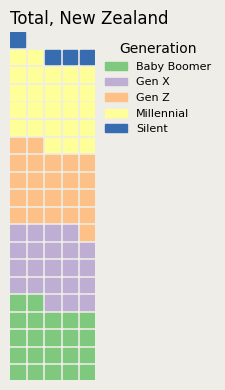

In [ ]:
# Choose data for plotting
df_plot = df_waffle_nz.copy()

# Define constants
col_name = df_plot.columns[0]

# Pass the axes defined by subplots to Waffle via FigureClass
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        111: {  # This specifies that we are dealing with a single subplot
            "values": df_plot[col_name],
            "labels": list(df_plot.index),
            "title": {"label": col_name, "loc": "left", "fontsize": 12},
            "rows": 20,
            "columns": 5,  # When setting both rows and columns, the value of each block will be scaled.
            "legend": {
                "bbox_to_anchor": (1, 1),
                "fontsize": 8,
                "title": "Generation",
                "frameon": False,  # Set frameon to False to remove the border
            },
            "rounding_rule": "floor",  # When rounding_rule is ceil or nearest, sum of scaled values might
            # be greater than chart size. If so, the blocks of last category would not be shown completely in the chart.
            "vertical": True,
        },
    },
    cmap_name="Accent",  # Color map name
    figsize=(8, 4),  # Overall figure size
)
fig.set_facecolor("#EEEDE7")

# Display the chart
plt.show()

Horizontal

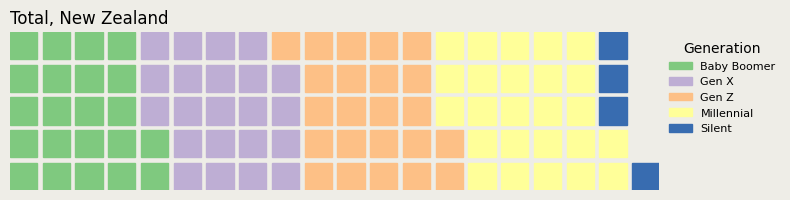

In [ ]:

# Choose data for plotting
df_plot = df_waffle_nz.copy()

# Define constants
col_name = df_plot.columns[0]

# Pass the axes defined by subplots to Waffle via FigureClass
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        111: {  # This specifies that we are dealing with a single subplot
            'values': df_plot[col_name],
            'labels': list(df_plot.index),
            'title': {'label': col_name, 'loc': 'left', 'fontsize': 12},
            'rows': 5,
            'columns': 20, # We now have more blocks so the values will be scaled
            'legend': {
                'loc': 'upper left',
                'bbox_to_anchor': (1, 1),
                'fontsize': 8,
                'title': 'Generation',
                'frameon': False,  # Set frameon to False to remove the border
            },
            'rounding_rule': 'floor', # When rounding_rule is ceil or nearest, sum of scaled values might be greater than chart size. If so, the blocks of last category would not be shown completely in the chart.
            'vertical': False
        },
    },
    cmap_name="Accent",  # Color map name
    figsize=(8, 4)  # Overall figure size
)
fig.set_facecolor("#EEEDE7")

# Display the chart
plt.show()

Icons

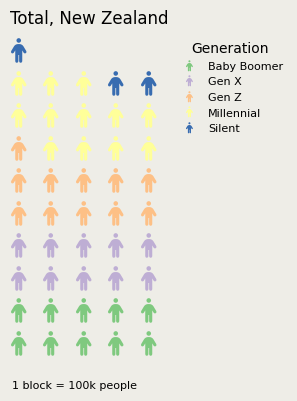

In [ ]:
# Choose data for plotting
df_plot = df_waffle_nz.copy()

# Define constants
col_name = df_plot.columns[0]
scale_factor = 100000

# Pass the axes defined by subplots to Waffle via FigureClass
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        111: {  # This specifies that we are dealing with a single subplot
            "values": df_plot[col_name] / scale_factor,
            "labels": list(df_plot.index),
            "title": {"label": col_name, "loc": "left", "fontsize": 12},
            "rows": 10,
            "legend": {
                "loc": "upper left",
                "bbox_to_anchor": (1, 1),
                "fontsize": 8,
                "title": "Generation",
                "frameon": False,  # Set frameon to False to remove the border
            },
            "rounding_rule": "ceil",  # needed so values less than 100000 will still have at least 1 block
            "vertical": True,
            "icons": "person",  # Using person icons for representation
            "icon_size": 18,  # Adjust icon size
            "icon_legend": True,
        },
    },
    cmap_name="Accent",  # Color map name
    figsize=(8, 4),  # Overall figure size
)

fig.supxlabel(
    f"1 block = {(scale_factor//1000)}k people",
    fontsize=8,
    x=0.1,  # position at the 14% axis
)
fig.set_facecolor("#EEEDE7")

# Display the chart
plt.show()



Multiple charts horizontal with icons and legend with values

In [ ]:
df_waffle_region

Region,Queenstown-Lakes district,Thames-Coromandel district,Wellington city
Generation,,,
Baby Boomer,7210,12250,30030
Gen X,8920,6040,40460
Gen Z,10970,3720,61550
Millennial,16860,4560,48860
Silent,1030,2490,5530


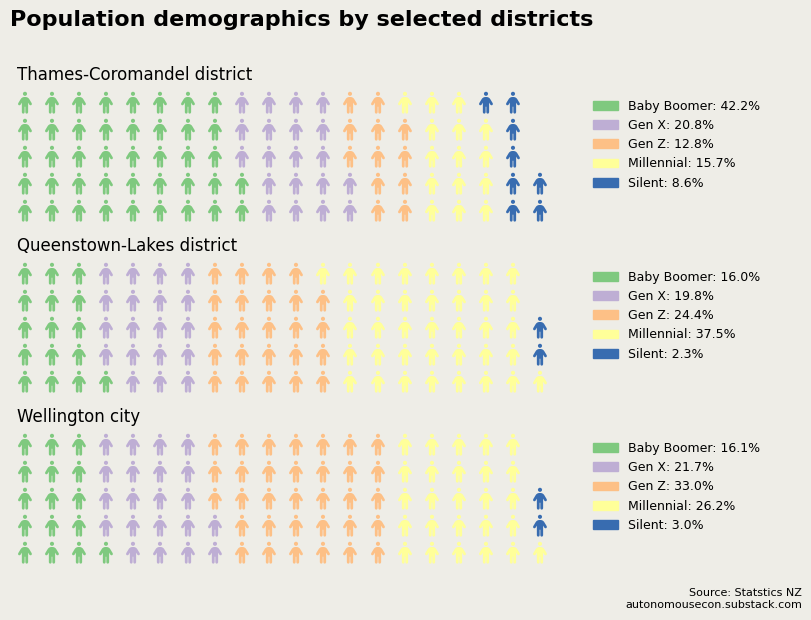

In [ ]:
# NZ + other regions waffle plot
region_1 = "Thames-Coromandel district"
region_2 = "Queenstown-Lakes district"
region_3 = "Wellington city"

df_waffle_region = df_waffle[
    (df_waffle["Region"].isin([region_1, region_2, region_3]))
    & (df_waffle["Generation"] != "Other")  # Remove under 15 year olds
].copy()

# Pivot the DataFrame using pivot_table
df_waffle_region = df_waffle_region.pivot_table(
    index="Generation", columns="Region", values="Population", aggfunc="sum"
)

df_plot = df_waffle_region.copy()

# Calculate the total sum for the percentage calculation
total_population = df_plot[region_1].sum()

plot1 = {
    # Convert actual number to a reasonable block number
    "values": [value for value in df_plot[region_1].tolist()],
    # Change labels to display the percentage of the whole
    "labels": [
        f"{index}: {value/total_population:.1%}"
        for index, value in zip(df_plot.index, df_plot[region_1])
    ],
    "legend": {
        "loc": "upper left",
        "bbox_to_anchor": (1.05, 1),
        "fontsize": 9,
        "frameon": False,
    },
    "title": {"label": region_1, "loc": "left", "fontsize": 12},
    "rounding_rule": "floor",
    "icons": "person",  # Using person icons for representation
    "icon_size": 16,  # Adjust icon size
}

total_population = df_plot[region_2].sum()

plot2 = {
    # Convert actual number to a reasonable block number
    "values": [value for value in df_plot[region_2].tolist()],
    # Change labels to display the percentage of the whole
    "labels": [
        f"{index}: {value/total_population:.1%}"
        for index, value in zip(df_plot.index, df_plot[region_2])
    ],
    "legend": {
        "loc": "upper left",
        "bbox_to_anchor": (1.05, 1),
        "fontsize": 9,
        "frameon": False,
    },
    "title": {"label": region_2, "loc": "left", "fontsize": 12},
    "rounding_rule": "floor",
    "icons": "person",  # Using person icons for representation
    "icon_size": 16,  # Adjust icon size
}

total_population = df_plot[region_3].sum()

plot3 = {
    # Convert actual number to a reasonable block number
    "values": [value for value in df_plot[region_3].tolist()],
    # Change labels to display the percentage of the whole
    "labels": [
        f"{index}: {value/total_population:.1%}"
        for index, value in zip(df_plot.index, df_plot[region_3])
    ],
    "legend": {
        "loc": "upper left",
        "bbox_to_anchor": (1.05, 1),
        "fontsize": 9,
        "frameon": False,
    },
    "title": {"label": region_3, "loc": "left", "fontsize": 12},
    "rounding_rule": "floor",
    "icons": "person",  # Using person icons for representation
    "icon_size": 16,  # Adjust icon size
}

fig = plt.figure(
    FigureClass=Waffle,
    plots={
        311: plot1,
        312: plot2,
        313: plot3,
    },
    rows=5,  # Outside parameter applied to all subplots.
    columns=20,
    cmap_name="Accent",
    figsize=(8, 6),
)

# Add a title and a small detail at the bottom
fig.suptitle(
    "Population demographics by selected districts",
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="left",
    x=0.01,
    y=1.01,
)

fig.supxlabel(
    f"Source: Statstics NZ\nautonomousecon.substack.com",
    fontsize=8,
    x=1,  # position at the 14% axis
    ha="right",
)

fig.set_facecolor("#EEEDE7")

plt.show()

In [ ]:
df_plot = df_waffle_region[region_1]

top_category = df_plot.idxmax()

In [ ]:
top_category

'Baby Boomer'

In [ ]:

alphas = [0.8 if index == top_category else 0.1 for index in df_plot.index]

In [ ]:

alphas

[0.8, 0.1, 0.1, 0.1, 0.1]

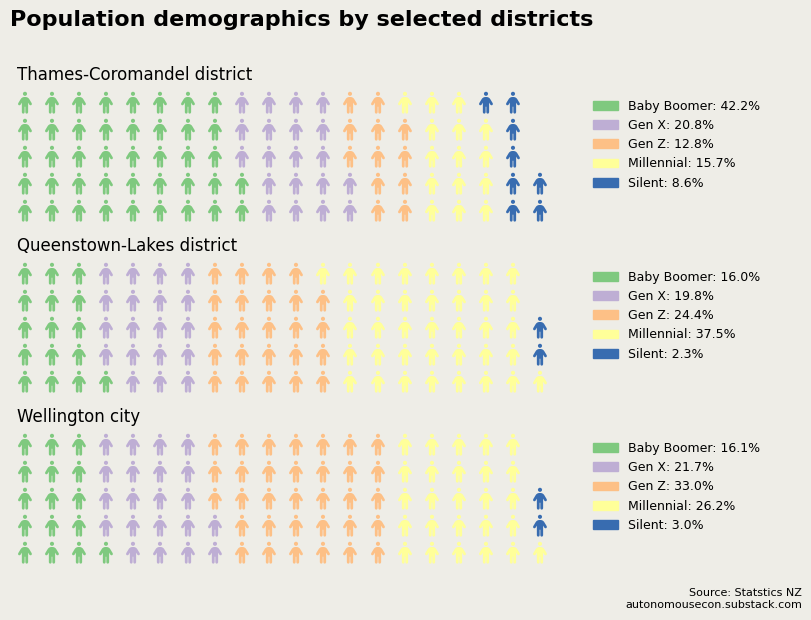

In [ ]:

# Filtering and setup as per your existing logic
region_1 = "Thames-Coromandel district"
region_2 = "Queenstown-Lakes district"
region_3 = "Wellington city"

df_waffle_region = df_waffle[
    (df_waffle["Region"].isin([region_1, region_2, region_3]))
    & (df_waffle["Generation"] != "Other")  # Remove under 15 year olds
].copy()

# Pivot the DataFrame using pivot_table
df_waffle_region = df_waffle_region.pivot_table(
    index="Generation", columns="Region", values="Population", aggfunc="sum"
)

# Function to create a plot dict for a given region
def create_plot_data(region):
    df_plot = df_waffle_region[region]
    total_population = df_plot.sum()

    values = [value for value in df_plot.tolist()]
    labels = [f"{index}: {value/total_population:.1%}" for index, value in zip(df_plot.index, df_plot)]

    plot_data = {
        "values": values,
        "labels": labels,
        "legend": {
            "loc": "upper left",
            "bbox_to_anchor": (1.05, 1),
            "fontsize": 9,
            "frameon": False,
        },
        "title": {"label": region, "loc": "left", "fontsize": 12},
        "rounding_rule": "floor",
        "icons": "person",
        "icon_size": 16,
    }
    return plot_data

plot1 = create_plot_data(region_1)
plot2 = create_plot_data(region_2)
plot3 = create_plot_data(region_3)

fig = plt.figure(
    FigureClass=Waffle,
    plots={
        311: plot1,
        312: plot2,
        313: plot3,
    },
    rows=5,  # Common parameter applied to all subplots.
    columns=20,
    cmap_name="Accent",
    figsize=(8, 6),
)

# Common figure settings
fig.suptitle("Population demographics by selected districts", fontsize=16, fontweight="bold", va="top", ha="left", x=0.01, y=1.01)
fig.supxlabel(f"Source: Statstics NZ\nautonomousecon.substack.com", fontsize=8, x=1, ha="right")
fig.set_facecolor("#EEEDE7")

plt.show()


Multiple charts - use scaled values with icons - no legend and just one legend box

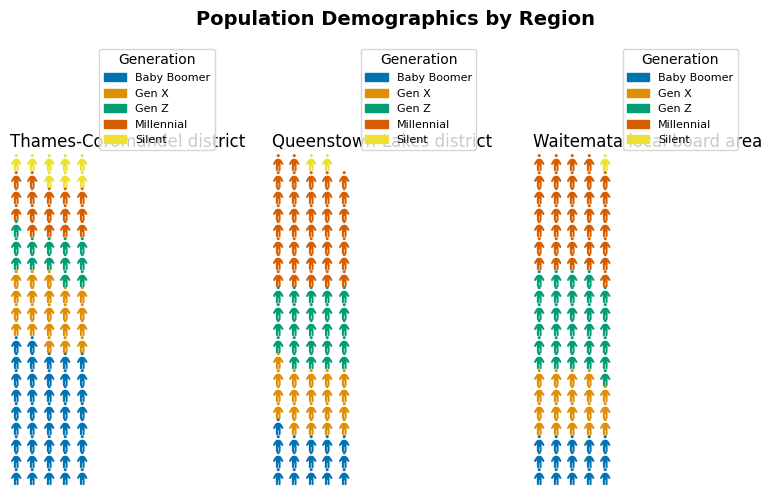

In [ ]:

import matplotlib.pyplot as plt
from pywaffle import Waffle
import pandas as pd

# Assuming df_waffle is already defined and loaded
# Define the regions and filter the dataframe
regions = ["Thames-Coromandel district", "Queenstown-Lakes district", "Waitemata local board area"]
df_waffle_region = df_waffle[
    (df_waffle["Region"].isin(regions)) &
    (df_waffle["Generation"] != "Other")  # Exclude 'Other' generation (under 15 years old)
].copy()

# Pivot the DataFrame to prepare for plotting
df_pivot = df_waffle_region.pivot_table(
    index="Generation", columns="Region", values="Population", aggfunc="sum"
)

# Colors and icons setup
colors = ["#0173b2", "#de8f05", "#029e73", "#d55e00", "#ece133"]  # You can customize these colors as needed

# Create the Waffle Chart for each region
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        (1, 3, i+1): {  # 1 row, 3 columns, subplot index starting from 1
            "values": df_pivot[region] / 1000,  # Scale values
            "labels": list(df_pivot.index),
            "colors": colors[:len(df_pivot.index)],  # Use colors based on the number of index labels
            "title": {"label": region, "loc": "left"},
            "icons": 'person',  # Using person icons for representation
            "rows": 20,
            "columns": 5,  # More columns for a more granular representation
            "icon_size": 12,  # Adjust icon size
            #"icon_legend": True,
            legend= {"loc": "lower left", "bbox_to_anchor": (1.05, 1), "fontsize": 8, "title": "Generation"}

        } for i, region in enumerate(regions)
    },
    figsize=(8, 5),  # Wider figure to accommodate three subplots
    vertical=True,
)

# Adding overall figure title
plt.suptitle("Population Demographics by Region", fontsize=14, fontweight="bold")
plt.show()


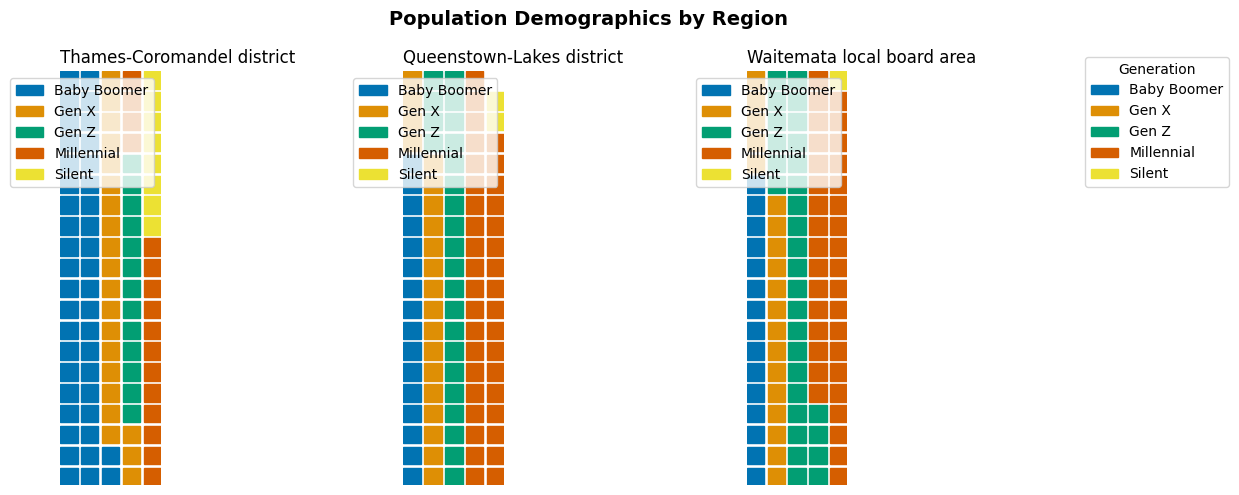

In [ ]:
import matplotlib.pyplot as plt
from pywaffle import Waffle
import pandas as pd

# Assuming df_waffle is defined and loaded

# Define regions and filter data
regions = ["Thames-Coromandel district", "Queenstown-Lakes district", "Waitemata local board area"]
df_waffle_region = df_waffle[
    (df_waffle["Region"].isin(regions)) &
    (df_waffle["Generation"] != "Other")  # Exclude 'Other' generation
].copy()

# Pivot the DataFrame
df_pivot = df_waffle_region.pivot_table(
    index="Generation", columns="Region", values="Population", aggfunc="sum"
)

# Colors and icons setup
colors = ["#0173b2", "#de8f05", "#029e73", "#d55e00", "#ece133"]

# Create the Waffle Chart for each region
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        (1, 3, i+1): {
            "values": df_pivot[region] / 1000,
            "labels": list(df_pivot.index),
            "colors": colors[:len(df_pivot.index)],
            "title": {"label": region, "loc": "left"},
            #"icons": 'person',
            "rows": 20,
            "columns": 5,
            #"icon_size": 12,
            #"icon_legend": True  # Ensure this is false,
        } for i, region in enumerate(regions)
    },
    figsize=(12, 5),  # Adjust as needed
)

# Adding overall figure title
plt.suptitle("Population Demographics by Region", fontsize=14, fontweight="bold")

# Add a legend
legend_labels = df_plot.index
legend_elements = [
    mpatches.Patch(color=colors[i], label=legend_labels[i]) for i in range(len(colors))
]
fig.legend(
    handles=legend_elements,
    loc="upper right",
    title="Generation",
    bbox_to_anchor=(1.04, 0.9),
)

plt.show()


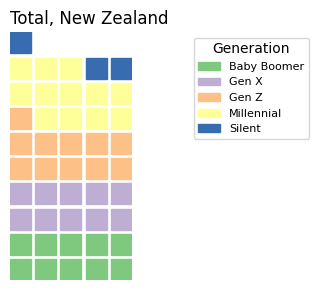

In [ ]:

# Load the dataset
df_waffle = pd.read_csv("/content/pop_estimate_processed_2023.csv", sep=",")

# NZ total only
df_waffle_nz = df_waffle[
    (df_waffle["Region"] == "Total, New Zealand")
    & (df_waffle["Generation"] != "Other")  # Remove under 15 year olds
].copy()

# Pivot the DataFrame using pivot_table
df_waffle_nz = df_waffle_nz.pivot_table(
    index="Generation", columns="Region", values="Population", aggfunc="sum"
)

# Waffle plot
df_plot = df_waffle_nz.copy()

col_name = df_plot.columns[0]


# Create the Waffle Chart
fig = plt.figure(
    FigureClass=Waffle,
    values = df_plot[col_name]/100000,
    labels=list(df_plot.index),
    title={"label": col_name, "loc": "left", "fontsize": 12},
    rows=10,  # Number of rows
    cmap_name="Accent",  # Color map name
    figsize=(5, 3),  # Figure size
    legend={"loc": "upper right", "bbox_to_anchor": (2.5, 1.0),"title":"Generation", "fontsize": 8},
    rounding_rule='ceil',
    vertical=True
)

# Display the chart
plt.show()

Total NZ waffle plot

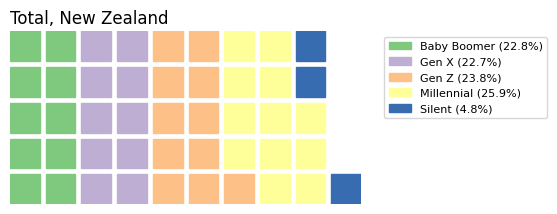

In [ ]:

# Load the dataset
df_waffle = pd.read_csv("/content/pop_estimate_processed_2023.csv", sep=",")

# NZ total only
df_waffle_nz = df_waffle[
    (df_waffle["Region"] == "Total, New Zealand")
    & (df_waffle["Generation"] != "Other")  # Remove under 15 year olds
].copy()

# Pivot the DataFrame using pivot_table
df_waffle_nz = df_waffle_nz.pivot_table(
    index="Generation", columns="Region", values="Population", aggfunc="sum"
)

# Waffle plot
df_plot = df_waffle_nz.copy()

# Calculate the total sum for the percentage calculation
total_population = df_plot["Total, New Zealand"].sum()

# Prepare plot details
plot = {
    # Convert actual number to a reasonable block number
    "values": [value / 100000 for value in df_plot["Total, New Zealand"].tolist()],
    # Change labels to display the percentage of the whole
    "labels": [
        f"{index} ({value/total_population:.1%})"
        for index, value in zip(df_plot.index, df_plot["Total, New Zealand"])
    ],
    "legend": {"loc": "upper left", "bbox_to_anchor": (1.05, 1), "fontsize": 8},
    "title": {"label": "Total, New Zealand", "loc": "left", "fontsize": 12},
}

# Create the Waffle Chart
fig = plt.figure(
    FigureClass=Waffle,
    plots={311: plot},
    rows=5,  # Number of rows
    cmap_name="Accent",  # Color map name
    rounding_rule="ceil",  # Rounding rule for values
    # icons='person',
    figsize=(8, 6),  # Figure size
)

# Display the chart
plt.show()

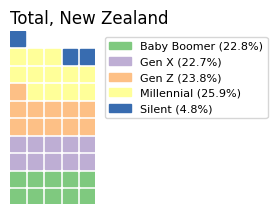

In [ ]:


# Load the dataset
df_waffle = pd.read_csv("/content/pop_estimate_processed_2023.csv", sep=",")

# NZ total only
df_waffle_nz = df_waffle[
    (df_waffle["Region"] == "Total, New Zealand")
    & (df_waffle["Generation"] != "Other")  # Remove under 15 year olds
].copy()

# Pivot the DataFrame using pivot_table
df_waffle_nz = df_waffle_nz.pivot_table(
    index="Generation", columns="Region", values="Population", aggfunc="sum"
)

# Waffle plot
df_plot = df_waffle_nz.copy()

# Calculate the total sum for the percentage calculation
total_population = df_plot["Total, New Zealand"].sum()

# Prepare plot details
plot = {
    # Convert actual number to a reasonable block number
    "values": [value / 100000 for value in df_plot["Total, New Zealand"].tolist()],
    # Change labels to display the percentage of the whole
    "labels": [
        f"{index} ({value/total_population:.1%})"
        for index, value in zip(df_plot.index, df_plot["Total, New Zealand"])
    ],
    "legend": {"loc": "upper left", "bbox_to_anchor": (1.05, 1), "fontsize": 8},
    "title": {"label": "Total, New Zealand", "loc": "left", "fontsize": 12},
}

# Create the Waffle Chart
fig = plt.figure(
    FigureClass=Waffle,
    plots={311: plot},
    rows=10,  # Number of rows
    # columns=20,
    cmap_name="Accent",  # Color map name
    rounding_rule="ceil",  # Rounding rule for values
    # icons='person',
    figsize=(8, 6),  # Figure size
    vertical=True
)

# Display the chart
plt.show()

NZ + other regions waffle plot

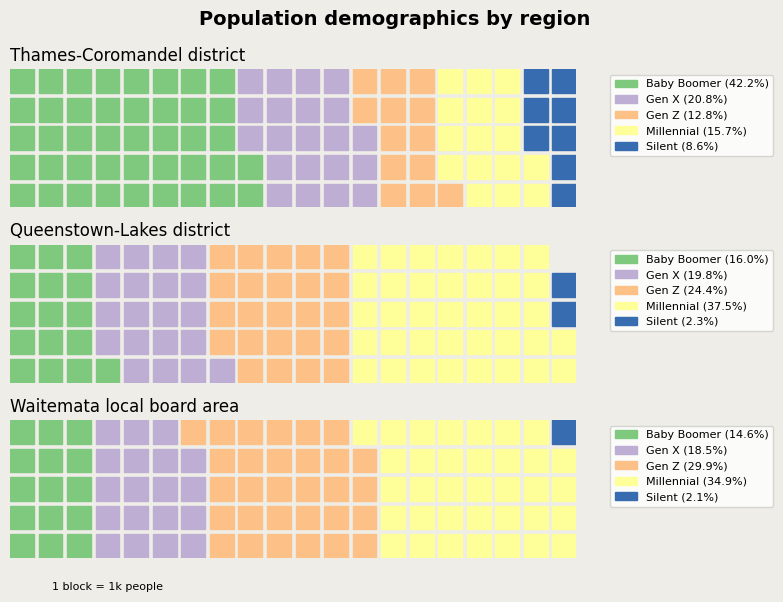

In [ ]:

# NZ + other regions waffle plot
region_1 = "Thames-Coromandel district"
region_2 = "Queenstown-Lakes district"
region_3 = "Wellington city"
scale_factor = 1000

df_waffle_region = df_waffle[
    (df_waffle["Region"].isin([region_1, region_2, region_3]))
    & (df_waffle["Generation"] != "Other")  # Remove under 15 year olds
].copy()

# Pivot the DataFrame using pivot_table
df_waffle_region = df_waffle_region.pivot_table(
    index="Generation", columns="Region", values="Population", aggfunc="sum"
)

df_plot = df_waffle_region.copy()

# Calculate the total sum for the percentage calculation
total_population = df_plot[region_1].sum()

plot1 = {
    # Convert actual number to a reasonable block number
    "values": [value / scale_factor for value in df_plot[region_1].tolist()],
    # Change labels to display the percentage of the whole
    "labels": [
        f"{index} ({value/total_population:.1%})"
        for index, value in zip(df_plot.index, df_plot[region_1])
    ],
    "legend": {"loc": "upper left", "bbox_to_anchor": (1.05, 1), "fontsize": 8},
    "title": {"label": region_1, "loc": "left", "fontsize": 12},
}

total_population = df_plot[region_2].sum()

plot2 = {
    # Convert actual number to a reasonable block number
    "values": [value / scale_factor for value in df_plot[region_2].tolist()],
    # Change labels to display the percentage of the whole
    "labels": [
        f"{index} ({value/total_population:.1%})"
        for index, value in zip(df_plot.index, df_plot[region_2])
    ],
    "legend": {"loc": "upper left", "bbox_to_anchor": (1.05, 1), "fontsize": 8},
    "title": {"label": region_2, "loc": "left", "fontsize": 12},
}

total_population = df_plot[region_3].sum()

plot3 = {
    # Convert actual number to a reasonable block number
    "values": [value / scale_factor for value in df_plot[region_3].tolist()],
    # Change labels to display the percentage of the whole
    "labels": [
        f"{index} ({value/total_population:.1%})"
        for index, value in zip(df_plot.index, df_plot[region_3])
    ],
    "legend": {"loc": "upper left", "bbox_to_anchor": (1.05, 1), "fontsize": 8},
    "title": {"label": region_3, "loc": "left", "fontsize": 12},
}

fig = plt.figure(
    FigureClass=Waffle,
    plots={
        311: plot1,
        312: plot2,
        313: plot3,
    },
    rows=5,  # Outside parameter applied to all subplots, same as below
    columns=20,
    cmap_name="Accent",  # Change color with cmap
    #rounding_rule="ceil",  # Change rounding rule, so value less than 1000 will still have at least 1 block
    rounding_rule="nearest",  # Change rounding rule, so value less than 1000 will still have at least 1 block
    figsize=(8, 6),
)

# Add a title and a small detail at the bottom
fig.suptitle("Population demographics by region", fontsize=14, fontweight="bold")
fig.supxlabel(
    "1 block = 1k people",
    fontsize=8,
    x=0.14,  # position at the 14% axis
)
fig.set_facecolor("#EEEDE7")

plt.show()

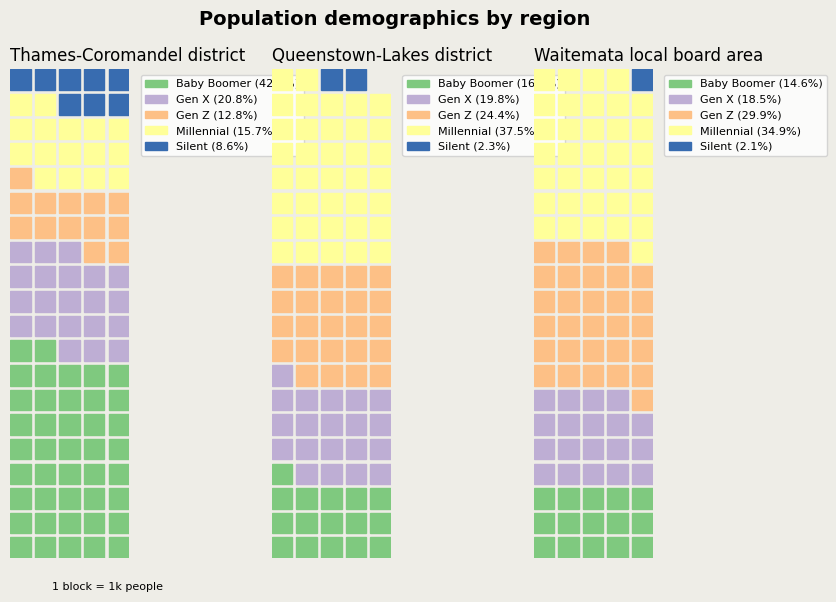

In [ ]:


# NZ + other regions waffle plot
region_1 = "Thames-Coromandel district"
region_2 = "Queenstown-Lakes district"
region_3 = "Waitemata local board area"
scale_factor = 1000

df_waffle_region = df_waffle[
    (df_waffle["Region"].isin([region_1, region_2, region_3]))
    & (df_waffle["Generation"] != "Other")  # Remove under 15 year olds
].copy()

# Pivot the DataFrame using pivot_table
df_waffle_region = df_waffle_region.pivot_table(
    index="Generation", columns="Region", values="Population", aggfunc="sum"
)

df_plot = df_waffle_region.copy()

# Calculate the total sum for the percentage calculation
total_population = df_plot[region_1].sum()

plot1 = {
    # Convert actual number to a reasonable block number
    "values": [value / scale_factor for value in df_plot[region_1].tolist()],
    # Change labels to display the percentage of the whole
    "labels": [
        f"{index} ({value/total_population:.1%})"
        for index, value in zip(df_plot.index, df_plot[region_1])
    ],
    "legend": {"loc": "upper left", "bbox_to_anchor": (1.05, 1), "fontsize": 8},
    "title": {"label": region_1, "loc": "left", "fontsize": 12},
}

total_population = df_plot[region_2].sum()

plot2 = {
    # Convert actual number to a reasonable block number
    "values": [value / scale_factor for value in df_plot[region_2].tolist()],
    # Change labels to display the percentage of the whole
    "labels": [
        f"{index} ({value/total_population:.1%})"
        for index, value in zip(df_plot.index, df_plot[region_2])
    ],
    "legend": {"loc": "upper left", "bbox_to_anchor": (1.05, 1), "fontsize": 8},
    "title": {"label": region_2, "loc": "left", "fontsize": 12},
}

total_population = df_plot[region_3].sum()

plot3 = {
    # Convert actual number to a reasonable block number
    "values": [value / scale_factor for value in df_plot[region_3].tolist()],
    # Change labels to display the percentage of the whole
    "labels": [
        f"{index} ({value/total_population:.1%})"
        for index, value in zip(df_plot.index, df_plot[region_3])
    ],
    "legend": {"loc": "upper left", "bbox_to_anchor": (1.05, 1), "fontsize": 8},
    "title": {"label": region_3, "loc": "left", "fontsize": 12},
}

fig = plt.figure(
    FigureClass=Waffle,
    plots={
        131: plot1,
        132: plot2,
        133: plot3,
    },
    rows=20,  # Outside parameter applied to all subplots, same as below
    columns=5,
    cmap_name="Accent",  # Change color with cmap
    #rounding_rule="ceil",  # Change rounding rule, so value less than 1000 will still have at least 1 block
    rounding_rule="nearest",  # Change rounding rule, so value less than 1000 will still have at least 1 block
    figsize=(8, 6),
    vertical=True
)

# Add a title and a small detail at the bottom
fig.suptitle("Population demographics by region", fontsize=14, fontweight="bold")
fig.supxlabel(
    "1 block = 1k people",
    fontsize=8,
    x=0.14,  # position at the 14% axis
)
fig.set_facecolor("#EEEDE7")

plt.show()

see https://pywaffle.readthedocs.io/en/latest/examples/value_scaling_and_auto_sizing.html

NZ + main centres waffle plot

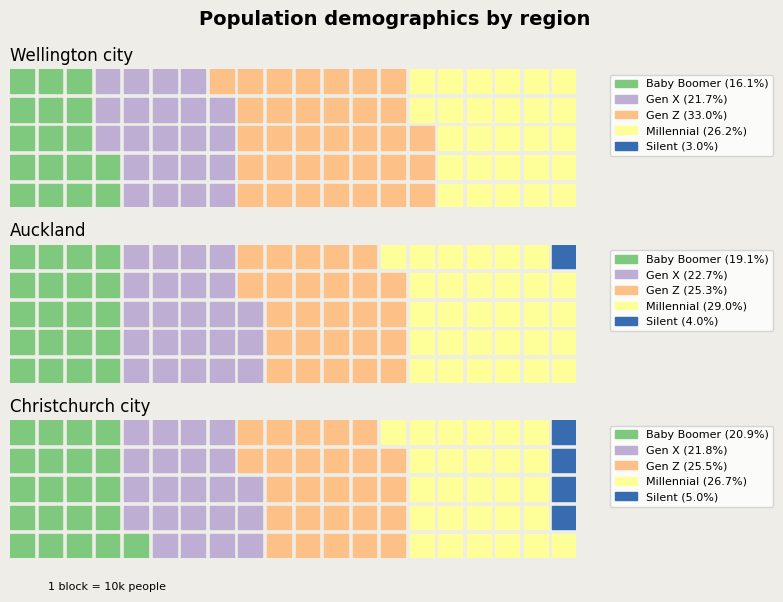

In [ ]:
# NZ + main centres waffle plot
region_1 = "Wellington city"
region_2 = "Auckland"
region_3 = "Christchurch city"
scale_factor = 10000

df_waffle_region = df_waffle[
    (df_waffle["Region"].isin([region_1, region_2, region_3]))
    & (df_waffle["Generation"] != "Other")  # Remove under 15 year olds
].copy()

# Pivot the DataFrame using pivot_table
df_waffle_region = df_waffle_region.pivot_table(
    index="Generation", columns="Region", values="Population", aggfunc="sum"
)

df_plot = df_waffle_region.copy()

# Calculate the total sum for the percentage calculation
total_population = df_plot[region_1].sum()

plot1 = {
    # Convert actual number to a reasonable block number
    "values": [value / scale_factor for value in df_plot[region_1].tolist()],
    # Change labels to display the percentage of the whole
    "labels": [
        f"{index} ({value/total_population:.1%})"
        for index, value in zip(df_plot.index, df_plot[region_1])
    ],
    "legend": {"loc": "upper left", "bbox_to_anchor": (1.05, 1), "fontsize": 8},
    "title": {"label": region_1, "loc": "left", "fontsize": 12},
}

total_population = df_plot[region_2].sum()

plot2 = {
    # Convert actual number to a reasonable block number
    "values": [value / scale_factor for value in df_plot[region_2].tolist()],
    # Change labels to display the percentage of the whole
    "labels": [
        f"{index} ({value/total_population:.1%})"
        for index, value in zip(df_plot.index, df_plot[region_2])
    ],
    "legend": {"loc": "upper left", "bbox_to_anchor": (1.05, 1), "fontsize": 8},
    "title": {"label": region_2, "loc": "left", "fontsize": 12},
}

total_population = df_plot[region_3].sum()

plot3 = {
    # Convert actual number to a reasonable block number
    "values": [value / scale_factor for value in df_plot[region_3].tolist()],
    # Change labels to display the percentage of the whole
    "labels": [
        f"{index} ({value/total_population:.1%})"
        for index, value in zip(df_plot.index, df_plot[region_3])
    ],
    "legend": {"loc": "upper left", "bbox_to_anchor": (1.05, 1), "fontsize": 8},
    "title": {"label": region_3, "loc": "left", "fontsize": 12},
}

fig = plt.figure(
    FigureClass=Waffle,
    plots={
        311: plot1,
        312: plot2,
        313: plot3,
    },
    rows=5,  # Outside parameter applied to all subplots, same as below,
    columns=20,
    cmap_name="Accent",  # Change color with cmap
    rounding_rule="ceil",  # Change rounding rule, so value less than 1000 will still have at least 1 block
    figsize=(8, 6),
)

# Add a title and a small detail at the bottom
fig.suptitle("Population demographics by region", fontsize=14, fontweight="bold")
fig.supxlabel(
    "1 block = 10k people",
    fontsize=8,
    x=0.14,  # position at the 14% axis
)
fig.set_facecolor("#EEEDE7")

plt.show()

 Waffle function with Icon

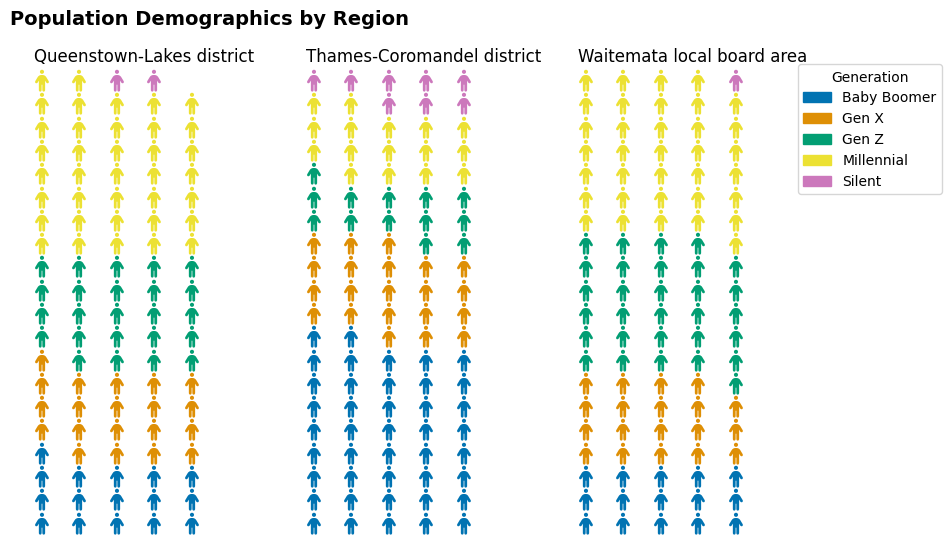

In [ ]:
###########################################################################
# Waffle function with Icon

# colorblind_palette = sns.color_palette("colorblind").as_hex()
# pastel_palette = sns.color_palette("colorblind").as_hex()
# print(colorblind_palette)
# cmap accent =['#7fc97f', '#beaed4', '#fdc086', '#bf5b17', '#386cb0']
# pastel = ['#0173b2', '#de8f05', '#029e73', '#d55e00', '#ece133']

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches  # for the legend
from pywaffle import Waffle
import pandas as pd

# NZ + other regions waffle plot
region_1 = "Thames-Coromandel district"
region_2 = "Queenstown-Lakes district"
region_3 = "Waitemata local board area"
scale_factor = 1000

df_waffle_region = df_waffle[
    (df_waffle["Region"].isin([region_1, region_2, region_3]))
    & (df_waffle["Generation"] != "Other")  # Remove under 15 year olds
].copy()

# Pivot the DataFrame using pivot_table
df_waffle_region = df_waffle_region.pivot_table(
    index="Generation", columns="Region", values="Population", aggfunc="sum"
)


df_plot = df_waffle_region.copy()


number_of_bars = len(df_plot.columns)  # one bar per year


BLUE = "#0173b2"
RED = "#de8f05"
GREEN = "#029e73"
YELLOW = "#ece133"
PINK='#cc78bc'
colors = [BLUE, RED, GREEN, YELLOW, PINK]
#colors=['#4a7493', '#b6a57a', '#5a7d6d', '#a3735a', '#b3b179']

# Init the whole figure and axes
fig, axs = plt.subplots(
    nrows=1,
    ncols=3,
    figsize=(10, 6),
)

# Iterate over each bar and create it
for i, ax in enumerate(axs):

    col_name = df_plot.columns[i]
    values = df_plot[col_name] / 1000  # values from the i-th column
    # values = df_plot[col_name]   # values from the i-th column

    Waffle.make_waffle(
        ax=ax,  # pass axis to make_waffle
        rows=20,
        columns=5, # if you just set rows or columsn only then you will have different sized bars: https://pywaffle.readthedocs.io/en/latest/examples/value_scaling_and_auto_sizing.html
        values=values,
        title={"label": col_name, "loc": "left"},
        colors=colors,
        vertical=True,
        icons='person',
        font_size=16,  # size of each point
        icon_legend=True,
        legend={"loc": "upper left", "bbox_to_anchor": (1, 1)},
        # Change argument rounding_rule to set a preferred rounding rule when scaling. It accepts floor or ceil or nearest.
    )

# Add a title
fig.suptitle(
    "Population Demographics by Region", fontsize=14, fontweight="bold",ha='right'
)


# Add a legend
legend_labels = df_plot.index
legend_elements = [
    mpatches.Patch(color=colors[i], label=legend_labels[i]) for i in range(len(colors))
]
fig.legend(
    handles=legend_elements,
    loc="upper right",
    title="Generation",
    bbox_to_anchor=(1.04, 0.9),
)

plt.subplots_adjust(right=0.85, wspace=0.5)
plt.show()

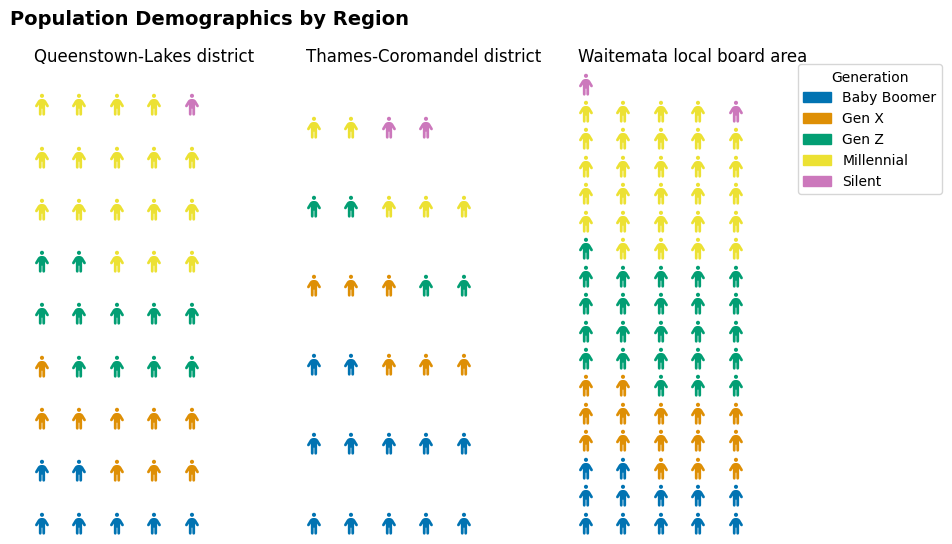

In [ ]:

###########################################################################
# Waffle function with Icon

# colorblind_palette = sns.color_palette("colorblind").as_hex()
# pastel_palette = sns.color_palette("colorblind").as_hex()
# print(colorblind_palette)
# cmap accent =['#7fc97f', '#beaed4', '#fdc086', '#bf5b17', '#386cb0']
# pastel = ['#0173b2', '#de8f05', '#029e73', '#d55e00', '#ece133']

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches  # for the legend
from pywaffle import Waffle
import pandas as pd

# NZ + other regions waffle plot
region_1 = "Thames-Coromandel district"
region_2 = "Queenstown-Lakes district"
region_3 = "Waitemata local board area"
scale_factor = 1000

df_waffle_region = df_waffle[
    (df_waffle["Region"].isin([region_1, region_2, region_3]))
    & (df_waffle["Generation"] != "Other")  # Remove under 15 year olds
].copy()

# Pivot the DataFrame using pivot_table
df_waffle_region = df_waffle_region.pivot_table(
    index="Generation", columns="Region", values="Population", aggfunc="sum"
)


df_plot = df_waffle_region.copy()


number_of_bars = len(df_plot.columns)  # one bar per year


BLUE = "#0173b2"
RED = "#de8f05"
GREEN = "#029e73"
YELLOW = "#ece133"
PINK='#cc78bc'
colors = [BLUE, RED, GREEN, YELLOW, PINK]
#colors=['#4a7493', '#b6a57a', '#5a7d6d', '#a3735a', '#b3b179']

# Init the whole figure and axes
fig, axs = plt.subplots(
    nrows=1,
    ncols=3,
    figsize=(10, 6),
)

# Iterate over each bar and create it
for i, ax in enumerate(axs):

    col_name = df_plot.columns[i]
    values = df_plot[col_name] / 1000  # values from the i-th column
    # values = df_plot[col_name]   # values from the i-th column

    Waffle.make_waffle(
        ax=ax,  # pass axis to make_waffle
        #rows=20,
        columns=5, # if you just set rows or columsn only then you will have different sized bars: https://pywaffle.readthedocs.io/en/latest/examples/value_scaling_and_auto_sizing.html
        values=values,
        title={"label": col_name, "loc": "left"},
        colors=colors,
        vertical=True,
        icons='person',
        font_size=16,  # size of each point
        icon_legend=True,
        legend={"loc": "upper left", "bbox_to_anchor": (1, 1)},
        # Change argument rounding_rule to set a preferred rounding rule when scaling. It accepts floor or ceil or nearest.
    )

# Add a title
fig.suptitle(
    "Population Demographics by Region", fontsize=14, fontweight="bold",ha='right'
)


# Add a legend
legend_labels = df_plot.index
legend_elements = [
    mpatches.Patch(color=colors[i], label=legend_labels[i]) for i in range(len(colors))
]
fig.legend(
    handles=legend_elements,
    loc="upper right",
    title="Generation",
    bbox_to_anchor=(1.04, 0.9),
)

plt.subplots_adjust(right=0.85, wspace=0.5)
plt.show()

See https://pywaffle.readthedocs.io/en/latest/

Heat map of generation vs region with proportion as values

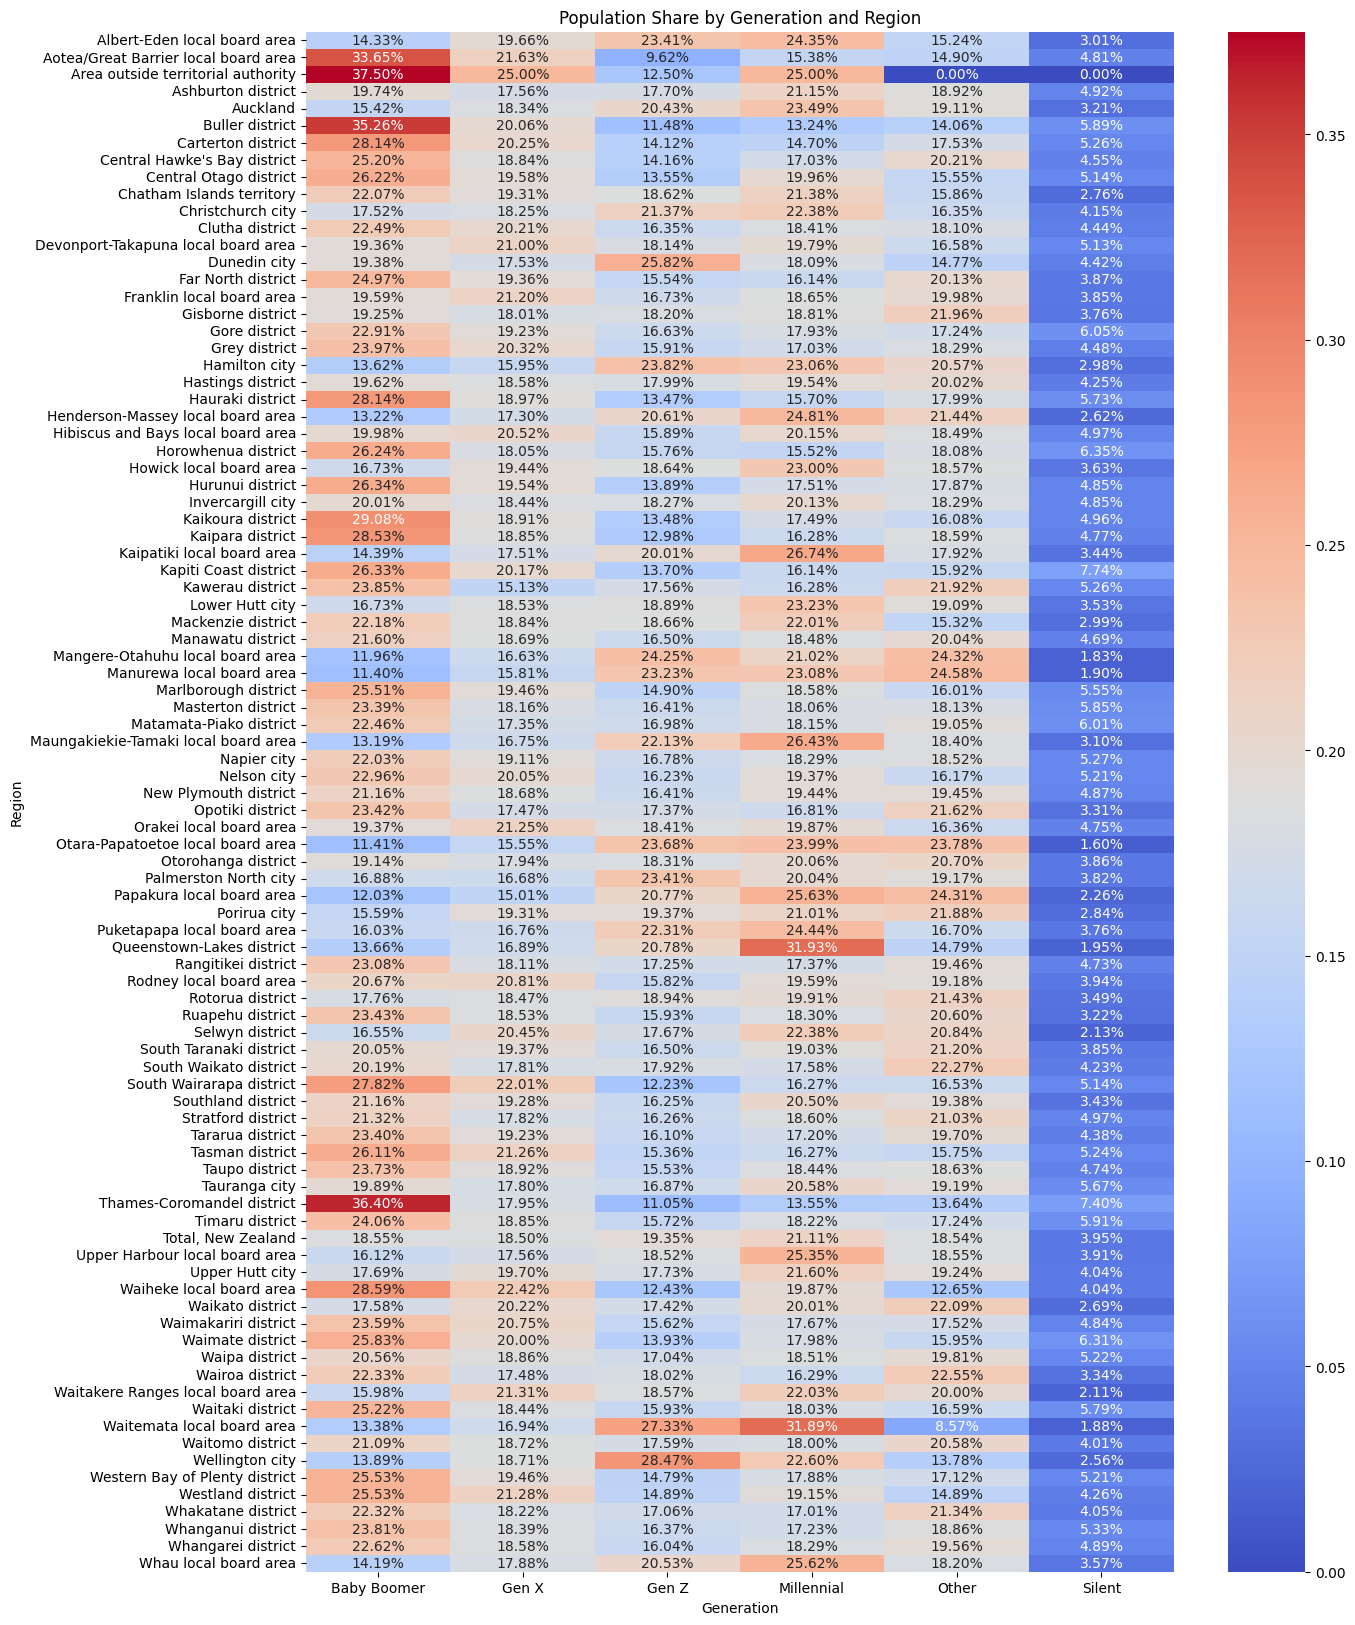

In [ ]:

###########################################################################
# Heat map of generation vs region with proportion as values

import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_heatmap = pd.read_csv("/content/pop_estimate_processed_2023.csv", sep=",")

# Pivot the DataFrame using pivot_table
df_heatmap_pivot = df_heatmap.pivot_table(
    index="Region", columns="Generation", values="Population", aggfunc="sum"
)

# Calculate the total population per region (sum across columns)
region_totals = df_heatmap_pivot.sum(axis=1)

# Divide each value in the dataframe by the corresponding region total to get the population share
df_heatmap_pivot_share = df_heatmap_pivot.div(region_totals, axis=0)

# Create the heatmap
plt.figure(figsize=(14, 20))
sns.heatmap(df_heatmap_pivot_share, annot=True, fmt=".2%", cmap="coolwarm")
plt.title("Population Share by Generation and Region")
plt.xlabel("Generation")
plt.ylabel("Region")
plt.show()